<a href="https://colab.research.google.com/github/Rx4M00N/IA_Tarea1/blob/main/CNN_Conjunto_propio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN conjuntos propios

In [ ]:
#Importació de las librerías requeridas
#Librerías para cálculos, operaciones y gráficas 
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
from posix import mkdir
import shutil
%matplotlib inline

#Librerías para el uso de redes de inteligencia artificial de Tensorflow
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image 
import warnings
warnings.filterwarnings('ignore')

## Preparación de los datos

Para poder ejecutar correctamente se debe disponer de la carpeta que se encuentra en el siguiente link, dicha carpeta debe encontrarse en "Mi unidad" del drive ya sea como acceso directo o como una carpeta propia.

Url: https://drive.google.com/drive/folders/17-FYcPTY414-kD1ZjIxy4CKocL9JBHg9?usp=sharing

In [ ]:
#Librería para acceder a google drive
from google.colab import drive
#Se accede a los documentos desde Google Drive
drive.mount('/content/gdrive')

#Se extraen los archivos del .zip tanto para las partes malas y las buenas
my_data_dir_def = !unzip gdrive/My\ Drive/mix_data/def_front.zip > /dev/null
my_data_dir_ok = !unzip gdrive/My\ Drive/mix_data/ok_front.zip > /dev/null

Mounted at /content/gdrive


In [ ]:
#Se establecen las rutas para abrir las carpetas con todas las piezas malas y las buenas
my_data_dir_def = 'def_front/'
my_data_dir_ok = 'ok_front/'

In [ ]:
#Se muestra la cantidad de piezas etiquetadas como malas y buenas, ambas en sus respectivas carpetas
print("Cantidad de piezas malas generales:",len(os.listdir(my_data_dir_def)))
print("Cantidad de piezas buenas generales:",len(os.listdir(my_data_dir_ok)))

Cantidad de piezas malas generales: 4211
Cantidad de piezas buenas generales: 3137


In [ ]:
#Crear carpeta general de data y sus rutas para dividir en entrenamiento y prueba
mkdir("data/")
mkdir("data/train")
mkdir("data/test")

In [ ]:
#Crear carpeta para train con sus subconjuntos
mkdir("data/train/def_front/")
traindef_path = 'data/train/def_front/'

mkdir("data/train/ok_front/")
trainok_path = 'data/train/ok_front/'

In [ ]:
#Crear carpeta test con sus subconjuntos
mkdir("data/test/def_front/")
testdef_path = 'data/test/def_front/'

mkdir("data/test/ok_front/")
testok_path = 'data/test/ok_front/'

In [ ]:
#Se asigna la información de las carpetas de defectuosas y de buenas a dos variables
#El comando os.listdir permite ver el contenido de la carpeta en una lista
def_data = os.listdir(my_data_dir_def)  #Variable que contiene lista de partes malas
ok_data = os.listdir(my_data_dir_ok)    #Variable que contiene lista de partes buenas

## Creación de los subconjuntos

Esta sección usa la información de la lista para recorrerla, para ello extrae 3758 elementos de manera al azar y crea una lista nueva con ellos, esta lista contiene la dirección de los elementos que se usaran para la prueba, se recorre por medio de un ciclo for y va moviendo los elementos hasta la carpeta de entrenamiento, luego con los archivos restantes se repite lo mismo pero para la carpeta de prueba

In [ ]:
#Se divide la información de las piezas malas entre el entrenamiento y la prueba
#Mover los 3758 datos de la carpeta de defectuosas a la carpeta de train
def_train_move = np.random.choice(def_data, 3758, False)  #Crea el array random

for x in def_train_move:
  shutil.move(my_data_dir_def+x, traindef_path) #Mueve los archivos random a la carpeta de train/def_front

def_data = os.listdir(my_data_dir_def) #Actualiza def_data para quitar los valores anteriores del array 

#Mover las restantes a la carpeta de test
for y in def_data:
  shutil.move(my_data_dir_def+y, testdef_path) #Mueve los archivos restantes a la carpeta de test/def_front

Esta sección usa la información de la lista para recorrerla, para ello extrae 2875 elementos de manera al azar de la carpeta de piezas buenas y crea una lista nueva con ellos, esta lista contiene la dirección de los elementos que se usaran para la prueba, se recorre por medio de un ciclo for y va moviendo los elementos hasta la carpeta de entrenamiento, luego con los archivos restantes se repite lo mismo pero para la carpeta de prueba

In [ ]:
#Se divide la información de las piezas buenas entre el entrenamiento y la prueba
#Mover los 2875 datos de la carpeta de defectuosas a la carpeta de train
ok_train_move = np.random.choice(ok_data, 2875, False)  #Crea el array randombsin repetir

for x in ok_train_move:
  shutil.move(my_data_dir_ok+x, trainok_path) #Mueve los archivos random a la carpeta de train/ok_front

ok_data = os.listdir(my_data_dir_ok)  #Actualiza el array de ok_data

#Mover las restantes a la carpeta de test
for y in ok_data:
  shutil.move(my_data_dir_ok+y, testok_path) #Mueve los archivos restantes a la carpeta de test/ok_front

Se cuentan la cantidad de archivos contenidos en cada carpeta, solo para verificar que todo se completo de manera correcta

In [ ]:
#Se muestra la cantidad de piezas etiquetadas como defectuosas y como buenas en el subconjunto de entrenamiento/train
print("Cantidad de piezas de train malas def_front:",len(os.listdir(traindef_path)))
print("Cantidad de piezas de train buenas ok_front:",len(os.listdir(trainok_path)))

Cantidad de piezas de train malas def_front: 3758
Cantidad de piezas de train buenas ok_front: 2875


In [ ]:
#Se muestra la cantidad de piezas etiquetadas como defectuosas y como buenas en el subconjunto de prueba/test
print("Cantidad de piezas de test malas def_front:",len(os.listdir(testdef_path)))
print("Cantidad de piezas de test buenas ok_front:",len(os.listdir(testok_path)))

Cantidad de piezas de test malas def_front: 453
Cantidad de piezas de test buenas ok_front: 262


A partir de esta sección se realiza lo mismo que con la red de datos de los autores, el modelo utilizado será el seleccionado después de evaluar los hiperparámetros, de esta manera se realiza una comparación bajo las mismas condicones de red.

In [ ]:
#Se crean dos variables con las rutas a las carpetas de train y de test generales
train_path = 'data/train/'
test_path = 'data/test/'

#Creación de 2 parámetros de la red, donde se da la información como el tamaño de pixeles de la imágen
image_shape = (300,300,1)
batch_size = 32 #Se ajusta en realción a los y el tipo de problema

In [ ]:
# Se normaliza la imágen escalando los valores a grises y así tener solo una clase
image_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
#Preparación de los datos de entrenamiento
train_set = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode="grayscale",
                                               batch_size=batch_size,            #Tamaño de los paquetes que se analizan
                                               class_mode='binary',shuffle=True) #Establece que va a ser de manera binaria, asigna 0 a defectuosa y 1 a buena

#Preparación de los datos de prueba
test_set = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [ ]:
#Se usa para demostrar que las piezas defectuosas son tomadas como 0 y las buenas como 1
train_set.class_indices

{'def_front': 0, 'ok_front': 1}

## Creación del modelo convolucional

Se crea el modelo convolucional donde se definen características como cantidad de filtros, tamaño del kernel por capa, tamaño del pooling y otros hiperparámetros como el stride o el zero padding, en esta sección también se crea la red densa de clasificación que se ubica al final de la CNN.

Para su elaboración se hizo de manera secuencial 3 ciclos de convolucional y de pooling y una única capa oculta.

In [ ]:
#Creación del modelo CNN
#Se crea una secuencia, la cual es una función de tensorflow
model = Sequential()

#Primeras capas, una convolucional y otra de pooling para reducir
#Se puede cambiar la cantidad de filtros, el tamaño del kernel, el valor del stride (salto), la existencia o no del padding
#Se introduce en tamaño de la imagen (300x300) y la función de activación,la cual es una reLu.
model.add(Conv2D(filters=8, kernel_size=(3,3), strides=(1, 1), padding="valid", input_shape=image_shape, activation='relu',)) #Ciclo 1, kernel 3x3, 8 filtros, stride=1
model.add(MaxPooling2D(pool_size=(2, 2)))                                                                                     #sin padding, MaxPooling de 2x2

#Segunda capa, una convolucional y otra de pooling para reducir
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1, 1), padding="valid", input_shape=image_shape, activation='relu',)) #Ciclo 2, kernel 3x3, 16 filtros, stride=1
model.add(MaxPooling2D(pool_size=(2, 2)))                                                                                      #sin padding, MaxPooling de 2x2

#Tercera capa, una convolucional y otra de pooling para reducir
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1, 1), padding="valid", input_shape=image_shape, activation='relu',)) #Ciclo 3, kernel 3x3, 16 filtros, stride=1
model.add(MaxPooling2D(pool_size=(2, 2)))                                                                                      #sin padding, MaxPooling de 2x2

#Al finalizar el proceso se pasa por una etápa de flattering para acondicionar los datos para la red de clasificación
model.add(Flatten())

#Comienzo de la red densa de clasificación

model.add(Dense(75))              #75 neuronas en una capa
model.add(Activation('sigmoid'))   #Función de activación de tipo sigmpoide debido a que es densa
#model.add(Dropout(0.5))

# Última capa, salida de la red
model.add(Dense(1, activation='sigmoid'))  #Se establece una neurona de saldia debido a la elección de categoría binaria

model.compile(loss='binary_crossentropy',  #Red densa de clasificación
              optimizer='adam',
              metrics=['accuracy'])
#Early_stop monitorea la pérdida obtenida y si empieza a ver que se estanca detiene el entrenamiento
early_stop = EarlyStopping(monitor='loss',patience=2) 

Luego de crear el modelo se procede a entrenarlo, para ello se usa el conjunto de datos de entrenamiento y se corre por 20 iteraciones o hasta que el early_stop decida detener el entrenamiento

In [ ]:
#Entrenamiento de la red CNN
results = model.fit_generator(train_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])

Epoch 1/20
208/208 [==============================] - 17s 81ms/step - loss: 0.5099 - accuracy: 0.7401 - val_loss: 0.3373 - val_accuracy: 0.8573
Epoch 2/20
208/208 [==============================] - 17s 79ms/step - loss: 0.2213 - accuracy: 0.9224 - val_loss: 0.1277 - val_accuracy: 0.9636
Epoch 3/20
208/208 [==============================] - 17s 81ms/step - loss: 0.1204 - accuracy: 0.9683 - val_loss: 0.0872 - val_accuracy: 0.9804
Epoch 4/20
208/208 [==============================] - 17s 80ms/step - loss: 0.0813 - accuracy: 0.9812 - val_loss: 0.0673 - val_accuracy: 0.9902
Epoch 5/20
208/208 [==============================] - 18s 86ms/step - loss: 0.0530 - accuracy: 0.9891 - val_loss: 0.0521 - val_accuracy: 0.9832
Epoch 6/20
208/208 [==============================] - 18s 86ms/step - loss: 0.0476 - accuracy: 0.9896 - val_loss: 0.0478 - val_accuracy: 0.9874
Epoch 7/20
208/208 [==============================] - 17s 81ms/step - loss: 0.0400 - accuracy: 0.9907 - val_loss: 0.0295 - val_accuracy:

## Resultados del entrenamiento

Text(0, 0.5, 'Error')

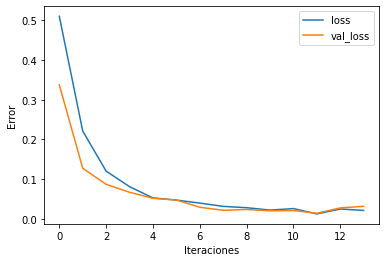

In [ ]:
#Se grafica la perdida
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()
plt.xlabel('Iteraciones')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

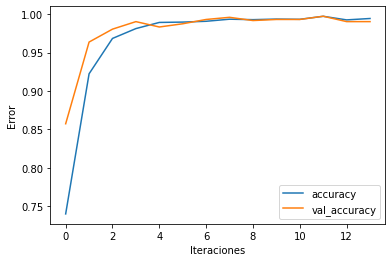

In [ ]:
#Se grafica la presición obtenida
losses[['accuracy','val_accuracy']].plot()
plt.xlabel('Iteraciones')
plt.ylabel('Error')

In [ ]:
'''
Variable que predice la probabilidad de pertener a una categoría
Recordando que solo existe una neurona de salida por ser binario
por lo que se requiere para establecer un margen
'''
pred_probability = model.predict_generator(test_set)

#En caso de superar un 0.5, pasa a considerarse un 1 o pieza buena
predictions = pred_probability > 0.5

In [ ]:
#Se imprimen en pantalla una tabla resumen de los resultado
#Se indica la presición que tiene al clasificar el conjunto de test
print(classification_report(test_set.classes,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       453
           1       0.98      1.00      0.99       262

    accuracy                           0.99       715
   macro avg       0.99      0.99      0.99       715
weighted avg       0.99      0.99      0.99       715



Lo último que se realiza es la matriz de confusión, esta será la encargada de verificar el fucnionamiento de la red, para poder conocer que tan bien entrenada está, un resultado negativo sería que la red falle muchos resultados al clasificar, lo que obligaría a volver a entrenarla o modificarla para un mejor reultado

Text(69.0, 0.5, 'Predicción')

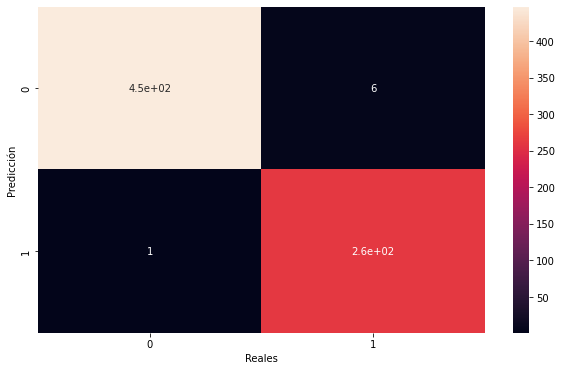

In [ ]:
#Se grafica la matriz de confusión para evaluar el funcionamiento de la red
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_set.classes,predictions),annot=True)
plt.xlabel("Reales")
plt.ylabel("Predicción")